In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set()

### Загружаем датасеты, создаем вспомогательные для манипуляций

In [2]:
train = pd.read_csv('D:Учеба/Анализ данных/spaceship-titanic/train.csv')
test =  pd.read_csv('D:Учеба/Анализ данных/spaceship-titanic/test.csv')

dttrain = train
dttest = test

train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### __SPT, Bool_to_num__ - функции, которые нужны для разделения колонок (PassengerId и Cabin) и перевода булевых значений в числовые (CryoSleep, VIP, Transported).

In [3]:
def SPT(dt, clm, new_clm, s_sign):
    n = len(new_clm)
    for i in range(n):
        dt.loc[dt[clm].notna(), new_clm[i]] = dt.loc[dt[clm].notna(), clm].apply(lambda x: x.split(s_sign)[i])
def Bool_to_num(dt, clm):
    dt.loc[dt[clm].notna(), clm] = dt.loc[dt[clm].notna(), clm].apply(lambda x: int(x))

In [4]:
Bool_to_num(dttrain, 'CryoSleep')
Bool_to_num(dttrain, 'VIP')
Bool_to_num(dttrain, 'Transported')

SPT(dttrain, 'PassengerId', ['P_group', 'P_num'], '_')
SPT(dttrain, 'Cabin', ['C_deck', 'C_num', 'C_side'], '/')

dttrain

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\1922975441.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 0 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dt.loc[dt[clm].notna(), clm] = dt.loc[dt[clm].notna(), clm].apply(lambda x: int(x))


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,P_group,P_num,C_deck,C_num,C_side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,01,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,01,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,01,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,02,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,01,A,98,P
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,01,G,1499,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,01,G,1500,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,01,E,608,S


### Создаем колонку __Cost__, где указывается общие расходы пассажира с учетом, что пустые значения равны 0.

In [5]:
dttrain[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0, inplace=True)

dttrain['Cost'] = dttrain.RoomService + dttrain.FoodCourt + dttrain.ShoppingMall + dttrain.Spa + dttrain.VRDeck

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3262140595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dttrain[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0, inplace=True)


### Разделяем пассажиров на группы по возрасту и тратам (__AgeGroup, CostGroup__) при помощи ф-ции Grouping. Это нужно для упрощения обучения алгоритмов кластеризации

In [6]:
def Grouping(dt, clm, k):
    if clm == 'Age':
        dt.loc[dt[clm].notna(), clm+'Group'] = dt.loc[dt[clm].notna(), clm].apply(lambda x: 0 if x == 0 else int((x-0.000001)/dt[clm].max() * k) + 1).astype(int)
    else:
        dt.loc[dt[clm].notna(), clm+'Group'] = dt.loc[dt[clm].notna(), clm].apply(lambda x: int((x-0.000001)/dt[clm].max() * k)).astype(int)

In [7]:
Grouping(dttrain, 'Age', 6)
Grouping(dttrain, 'Cost', 5)
dttrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,P_group,P_num,C_deck,C_num,C_side,Cost,AgeGroup,CostGroup
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,0,0001,01,B,0,P,0.0,3.0,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,Juanna Vines,1,0002,01,F,0,S,736.0,2.0,0.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,Altark Susent,0,0003,01,A,0,S,10383.0,5.0,1.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,Solam Susent,0,0003,02,A,0,S,5176.0,3.0,0.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,Willy Santantines,1,0004,01,F,1,S,1091.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,...,Gravior Noxnuther,0,9276,01,A,98,P,8536.0,4.0,1.0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,...,Kurta Mondalley,0,9278,01,G,1499,S,0.0,2.0,0.0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,...,Fayey Connon,1,9279,01,G,1500,S,1873.0,2.0,0.0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,...,Celeon Hontichre,0,9280,01,E,608,S,4637.0,3.0,0.0


### Вводим вспомогательный датафрейм (__dt_train__) для упрощения тренировочных данных.

In [8]:
dt_train = dttrain[['P_group', 'P_num', 'HomePlanet', 'CryoSleep', 'C_deck', 'C_num', 'C_side', 'AgeGroup', 'VIP','CostGroup', 'Transported']]
dt_train.loc[:, 'P_group'] = dt_train.loc[:, 'P_group'].apply(lambda x: int(x))
dt_train.loc[:, 'P_num'] = dt_train.loc[:, 'P_num'].apply(lambda x: int(x))
dt_train.loc[dt_train.C_num.notna(), 'C_num'] = dt_train.loc[dt_train.C_num.notna(), 'C_num'].apply(lambda x: int(x)).astype(int)

### Рассматриваем строки, которые не содержат пропуски.

In [9]:
dt_train_notna = dt_train.dropna()
DT = dt_train_notna

## Анализ выживаемости пассажиров, отнесенных к той или иной группе:

### 1. По пункту отбытия (__HomePlanet__)

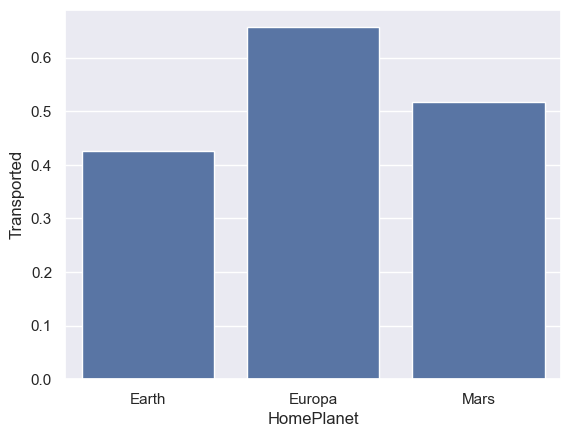

HomePlanet
Earth     3740
Europa    1741
Mars      1432
Name: count, dtype: int64

In [10]:
dt = dt_train_notna.groupby('HomePlanet', as_index=0).agg('Transported').mean()
sb.barplot(data=dt, x='HomePlanet', y='Transported')
plt.show()
dt_train_notna.HomePlanet.value_counts()

### 2. По палубе (__C_deck__)

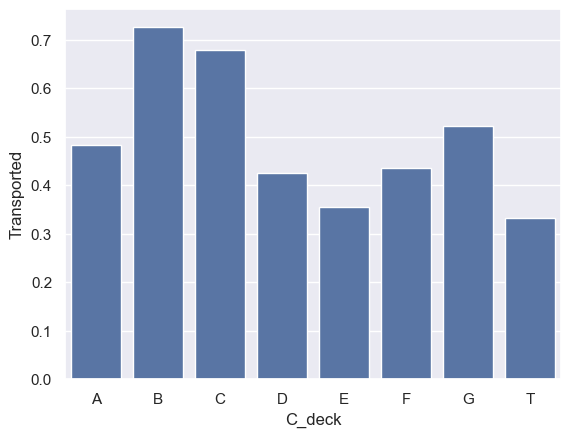

count     8.000000
unique    8.000000
top       0.483871
freq      1.000000
Name: Transported, dtype: float64

In [11]:
dt = dt_train_notna.groupby('C_deck', as_index=0).agg('Transported').mean()
sb.barplot(data=dt, x='C_deck', y='Transported')
plt.show()
dt.Transported.describe()

### 3. По стороне (__C_side__)

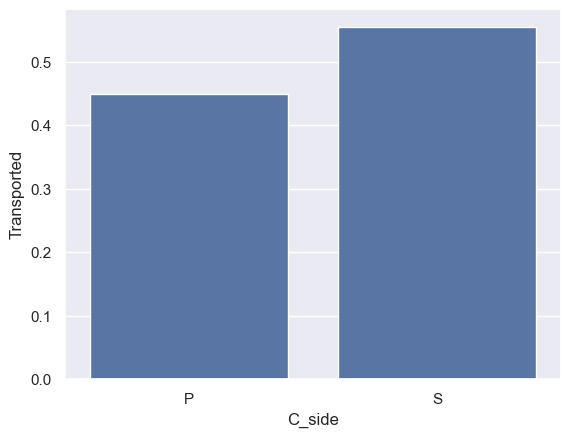

In [12]:
dt = dt_train_notna.groupby('C_side', as_index=0).agg('Transported').mean()
dt1 = dt_train_notna.groupby('C_side', as_index=0).agg('Transported').sum()
sb.barplot(data=dt, x='C_side', y='Transported')
plt.show()

### 4. По статусу (__VIP__)

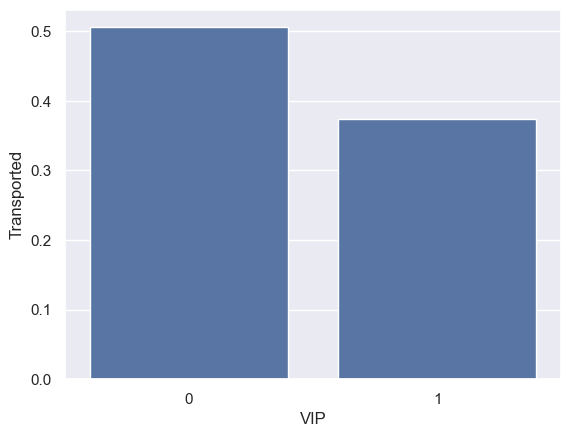

In [13]:
dt = dt_train_notna.groupby('VIP', as_index=0).agg('Transported').mean()
sb.barplot(data=dt, x='VIP', y='Transported')
plt.show()

### 5. По возрастной группе (__AgeGroup__)

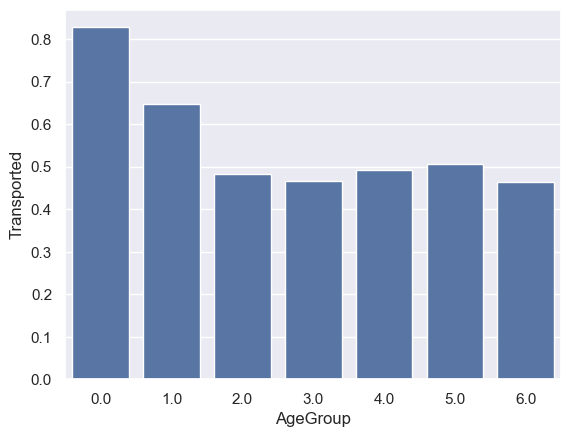

In [14]:
dt = dt_train_notna.groupby('AgeGroup', as_index=0).agg('Transported').mean()
sb.barplot(data=dt, x='AgeGroup', y='Transported')
plt.show()

### 6. По группе трат (__CostGroup__)

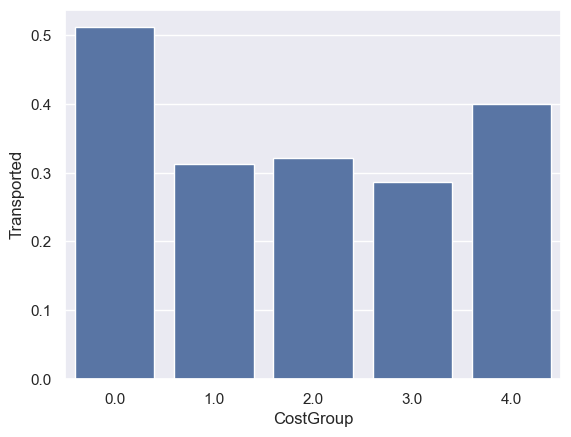

In [15]:
dt = dt_train_notna.groupby('CostGroup', as_index=0).agg('Transported').mean()
sb.barplot(data=dt, x='CostGroup', y='Transported')
plt.show()

### Категориальным значениям даем числовые метки (__HomePlanet, C_deck, C_side__). 

In [16]:
dt_train['HomePlanet'] = dt_train['HomePlanet'].map({'Earth':0, 'Mars':1, 'Europa':2})
dt_train['C_deck'] = dt_train['C_deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E':4, 'F':5, 'G':6, 'T':7})
dt_train['C_side'] = dt_train['C_side'].map({'P':0, 'S':1})
dt_train_notna = dt_train.dropna()
dt_train

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\686644359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['HomePlanet'] = dt_train['HomePlanet'].map({'Earth':0, 'Mars':1, 'Europa':2})
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\686644359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['C_deck'] = dt_train['C_deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E':4, 'F':5, 'G':6, 'T':7})
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\686644359.py:3: SettingWithCopyWarning: 
A value is

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup,Transported
0,1,1,2.0,0,1.0,0,0.0,3.0,0,0.0,0
1,2,1,0.0,0,5.0,0,1.0,2.0,0,0.0,1
2,3,1,2.0,0,0.0,0,1.0,5.0,1,1.0,0
3,3,2,2.0,0,0.0,0,1.0,3.0,0,0.0,0
4,4,1,0.0,0,5.0,1,1.0,2.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,2.0,0,0.0,98,0.0,4.0,1,1.0,0
8689,9278,1,0.0,1,6.0,1499,1.0,2.0,0,0.0,0
8690,9279,1,0.0,0,6.0,1500,1.0,2.0,0,0.0,1
8691,9280,1,2.0,0,4.0,608,1.0,3.0,0,0.0,0


### Составляем матрицу корреляций

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup,Transported
P_group,1.000000,0.000000,0.000000,0.000000,0.000000,0.675904,0.000000,0.000000,0.017690,0.000000,0.022717
P_num,0.000000,1.000000,0.103993,0.068008,-0.076778,-0.041150,0.013967,-0.128933,0.000000,0.018185,0.075657
HomePlanet,0.000000,0.103993,1.000000,0.116048,-0.871767,-0.481024,0.030070,0.244965,0.181766,0.288621,0.191542
CryoSleep,0.000000,0.068008,0.116048,1.000000,0.025088,-0.034380,0.017616,-0.065504,-0.081360,-0.141270,0.463412
C_deck,0.000000,-0.076778,-0.871767,0.025088,1.000000,0.537413,-0.035183,-0.259858,-0.196224,-0.281457,-0.110391
C_num,0.675904,-0.041150,-0.481024,-0.034380,0.537413,1.000000,-0.037382,-0.136395,-0.106709,-0.163063,-0.046979
C_side,0.000000,0.013967,0.030070,0.017616,-0.035183,-0.037382,1.000000,0.000000,0.000000,0.000000,0.105684
AgeGroup,0.000000,-0.128933,0.244965,-0.065504,-0.259858,-0.136395,0.000000,1.000000,0.097028,0.106839,-0.071100
VIP,0.017690,0.000000,0.181766,-0.081360,-0.196224,-0.106709,0.000000,0.097028,1.000000,0.122389,-0.040481
CostGroup,0.000000,0.018185,0.288621,-0.141270,-0.281457,-0.163063,0.000000,0.106839,0.122389,1.000000,-0.071537


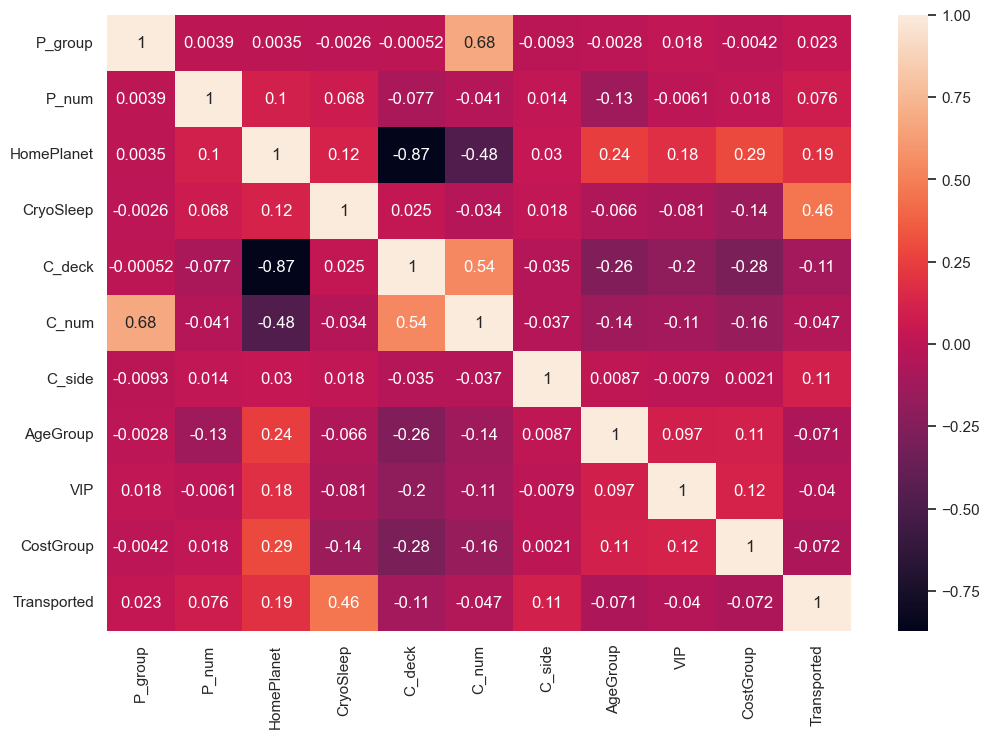

In [17]:
train_corr = dt_train_notna.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(train_corr, annot=True)
train_corr[abs(train_corr) < 0.01] = 0 
train_corr

### Эксперементально было установленно, что среди колонок: __HomePlanet, CryoSleep, AgeGroup, VIP, CostGroup__ - на частоту уникальных значений влияют больше всего первые 3 колонки. 
### По итогу данные распределяются на 7 групп, обладающие (почти) нормальным распределением.
### Создаем датафрейм (df) для частот уникальных значений.

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3409586058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'] = df.groupby(df.columns.tolist()).transform('size')
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3409586058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


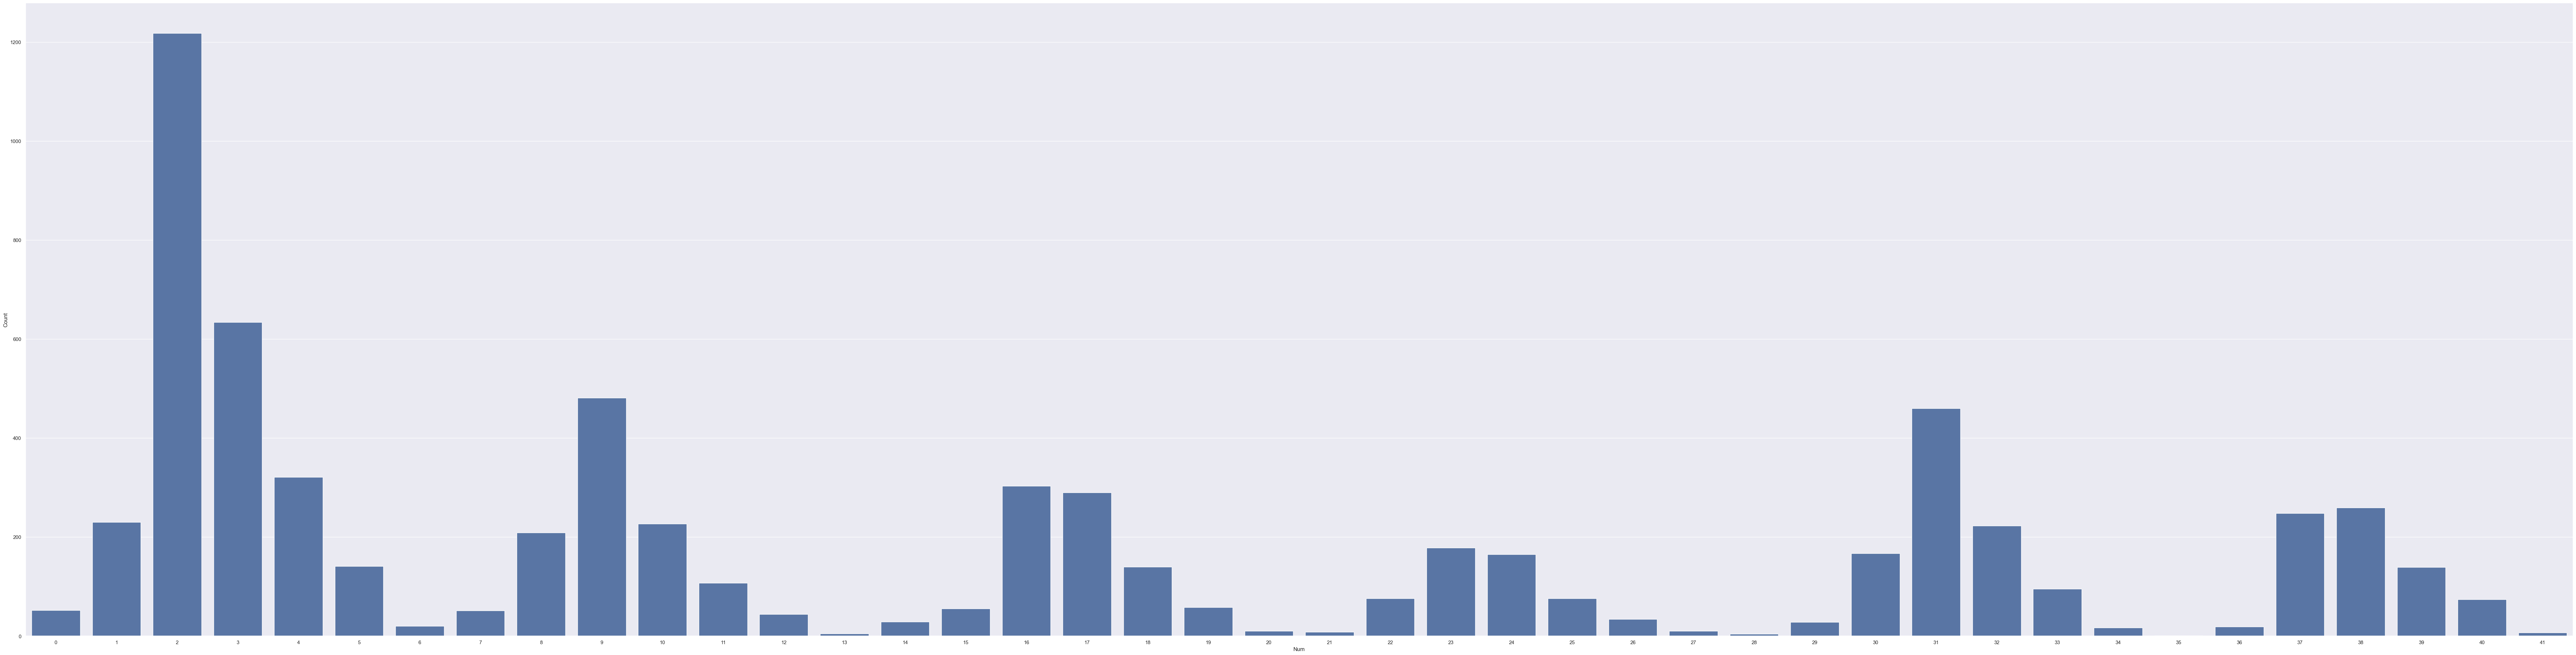

In [18]:
df = dt_train_notna[['HomePlanet', 'CryoSleep', 'AgeGroup']]
df['Count'] = df.groupby(df.columns.tolist()).transform('size')
df.drop_duplicates(inplace = True)
df = df.sort_values(['HomePlanet', 'CryoSleep', 'AgeGroup'])
plt.figure(figsize=(100, 25))
df.loc[:,'Num'] = np.array([i for i in range(len(df))])
sb.barplot(data=df, x='Num', y='Count')
plt.show()

### Ищем для каждой группы показатели среднего значения и среднеквадратичного отклонения (E, std).

In [19]:
for i in range(7):
    mask = (df.Num >= 6*i) & (df.Num < 6*(i+1))
    df.loc[mask, 'Count'] = df.loc[mask, 'Count']/df.loc[mask, 'Count'].sum()
    df.loc[mask,'E'] = (df.loc[mask, 'AgeGroup'] * df.loc[mask, 'Count']).sum()
    df.loc[mask,'std'] = (((df.loc[mask, 'AgeGroup'] - df.loc[mask,'E'])**2 * df.loc[mask, 'Count']).sum()) ** (0.5)
df

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\346367695.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.02003082 0.08859784 0.46918336 0.24422188 0.12365177 0.05431433]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Count'] = df.loc[mask, 'Count']/df.loc[mask, 'Count'].sum()


,HomePlanet,CryoSleep,AgeGroup,Count,Num,E,std
19,0.0,0,0.0,0.020031,0,2.525809,1.058255
24,0.0,0,1.0,0.088598,1,2.525809,1.058255
1,0.0,0,2.0,0.469183,2,2.525809,1.058255
8,0.0,0,3.0,0.244222,3,2.525809,1.058255
5,0.0,0,4.0,0.123652,4,2.525809,1.058255
49,0.0,0,5.0,0.054314,5,2.525809,1.058255
1157,0.0,0,6.0,0.018265,6,2.191781,1.109414
61,0.0,1,0.0,0.046575,7,2.191781,1.109414
21,0.0,1,1.0,0.190868,8,2.191781,1.109414
41,0.0,1,2.0,0.439269,9,2.191781,1.109414


### Выделяем данные из dt_train те, которые имеют пропуски (dt_train_isna)

In [20]:
dt_train_isna = dt_train[dt_train.isna().any(axis=1)]
dt_train_isna

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup,Transported
7,6,2,0.0,1,6.0,0,1.0,3.0,0,NaN,1
10,8,2,2.0,1,1.0,1,0.0,3.0,0,NaN,1
15,12,1,0.0,0,NaN,NaN,NaN,3.0,0,0.0,0
16,14,1,1.0,0,5.0,3,0.0,3.0,0,NaN,0
23,20,3,0.0,1,4.0,0,1.0,3.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
8667,9250,1,2.0,0,4.0,597,0.0,3.0,0,NaN,1
8674,9257,1,NaN,0,5.0,1892,0.0,1.0,0,0.0,0
8675,9259,1,0.0,NaN,5.0,1893,0.0,4.0,0,NaN,1
8684,9274,1,NaN,1,6.0,1508,0.0,2.0,0,0.0,1


### __Pop__ - ф-ция заполняющая пропуски по данным людей из той же группы. 

In [21]:
def Pop(clm, dt, dt_isna):
    P_group_nan = np.array(dt_isna[dt_isna[clm].isna()].P_group)
    for num in P_group_nan:
        if len(dt[(dt.P_group == num) & (dt[clm].notna())]) > 0:
            IDX_N = dt.index[(dt.P_group == num) & (dt[clm].notna())][0]
            IDX = dt_isna.index[dt_isna.P_group == num]
            for i in IDX:
                dt.loc[i, clm] = dt.loc[IDX_N, clm]
    
                dt_isna.loc[i, clm] = dt.loc[IDX_N, clm]

In [22]:
l_clm = list(dt_train.columns)
l_clm.remove('P_group')
l_clm.remove('P_num')
l_clm.remove('Transported')
for clm in l_clm:
    Pop(clm, dt_train, dt_train_isna)
dt_train_isna = dt_train[dt_train.isna().any(axis=1)]
dt_train_isna

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup,Transported
15,12,1,0.0,0,NaN,NaN,NaN,3.0,0,0.0,0
16,14,1,1.0,0,5.0,3,0.0,3.0,0,NaN,0
28,24,1,2.0,1,2.0,2,1.0,5.0,0,NaN,1
38,36,1,0.0,0,5.0,8,1.0,2.0,NaN,0.0,0
40,39,1,0.0,1,6.0,1,0.0,3.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
8666,9248,1,NaN,0,5.0,1792,1.0,3.0,NaN,0.0,1
8667,9250,1,2.0,0,4.0,597,0.0,3.0,0,NaN,1
8674,9257,1,NaN,0,5.0,1892,0.0,1.0,0,0.0,0
8675,9259,1,0.0,NaN,5.0,1893,0.0,4.0,0,NaN,1


### Остальные пропуски нельзя в общем случаем вывести. Поэтому в угоду репрезетативности выборки, воспользуемся принципом случайных чисел.
### Заполняем данные о кабине, выбирая случайные из свободных кабин.

In [23]:
c1 = [float(i) for i in range(7)]
c2 = [float(i) for i in range(1895)]
c3 = [0.0,1.0]
dt_cabin = (pd.MultiIndex.from_product([c1, c2, c3], names=['C_deck', 'C_num', 'C_side'])).to_frame(index=0)
dt_cabin = dt_cabin.merge(dt_train_notna[['C_deck', 'C_num', 'C_side']], on=['C_deck', 'C_num', 'C_side'], how='left', indicator=True)
dt_cabin = dt_cabin[dt_cabin['_merge'] == 'left_only'].drop('_merge',axis=1).reset_index(drop=True)

In [24]:
IDX_N = dt_train_isna.index[dt_train_isna.C_deck.isna()]
ind = []
for n in IDX_N:
    i = np.random.randint(0,21010)
    while i in ind:
        i = np.random.randint(0,21010)
    ind.append(i)
    dt_train.loc[n, ['C_deck', 'C_num', 'C_side']] = dt_cabin.loc[i, ['C_deck', 'C_num', 'C_side']]
    dt_train_isna.loc[n, ['C_deck', 'C_num', 'C_side']] = dt_cabin.loc[i, ['C_deck', 'C_num', 'C_side']]
dt_train_isna = dt_train[dt_train.isna().any(axis=1)]

### __RAND_Write__ - ф-ция которая дает случайные числа для данной колонки

In [25]:
def RAND_Write(clm, m, dt, dt_isna):
    IDX_N = dt_isna.index[dt_isna[clm].isna()]
    for n in IDX_N:
        dt.loc[n, clm] = np.random.randint(m)

In [26]:
RAND_Write('VIP', 2, dt_train, dt_train_isna)
RAND_Write('CryoSleep', 2, dt_train, dt_train_isna)
RAND_Write('HomePlanet', 3, dt_train, dt_train_isna)
dt_train_isna = dt_train[dt_train.isna().any(axis=1)]

### Заполнения значения группы затрат в зависимости от значения статуса

In [27]:
IDX_N = dt_train_isna.index[(dt_train_isna.CostGroup.isna())]
for n in IDX_N:
    if dt_train_isna.loc[n, 'VIP'] == 1:
        dt_train.loc[n, 'CostGroup'] = np.random.randint(0,3)
    else:
        dt_train.loc[n, 'CostGroup'] = np.random.randint(0,2)
dt_train_isna = dt_train[dt_train.isna().any(axis=1)]

### Пользуясь данными из df заполняем колонку возростная группа по принципу случайных чисел.

In [29]:
IDX_N = dt_train_isna.index[(dt_train_isna.AgeGroup.isna())]
for n in IDX_N:
    HP = dt_train_isna.loc[n, 'HomePlanet']
    CS = dt_train_isna.loc[n, 'CryoSleep']
    E = df.loc[(df.HomePlanet == HP) & (df.CryoSleep == CS), 'E'].mean()
    std = df.loc[(df.HomePlanet == HP) & (df.CryoSleep == CS), 'std'].mean()
    dt_train.loc[n, 'AgeGroup'] = int(np.random.normal(loc=E, scale=std))

dt_train['P_group'] = dt_train['P_group'].astype(int)
dt_train['P_num'] = dt_train['P_num'].astype(int)
dt_train['HomePlanet'] = dt_train['HomePlanet'].astype(int)
dt_train['C_deck'] = dt_train['C_deck'].astype(int)
dt_train['C_side'] = dt_train['C_side'].astype(int)
dt_train['AgeGroup'] = dt_train['AgeGroup'].astype(int)
dt_train['CostGroup'] = dt_train['CostGroup'].astype(int)
dt_train['VIP'] = dt_train['VIP'].astype(int)
dt_train['C_num'] = dt_train['C_num'].astype(int)
dt_train['Transported'] = dt_train['Transported'].astype(int)

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2749932473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['P_group'] = dt_train['P_group'].astype(int)
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2749932473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_train['P_num'] = dt_train['P_num'].astype(int)
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2749932473.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

### Проделываем теже манипуляции, но с тестовым датафреймом (test, dttest)

In [30]:
test[test.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4267,9260_01,Earth,True,G/1503/P,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [31]:
Bool_to_num(dttest, 'CryoSleep')
Bool_to_num(dttest, 'VIP')

SPT(dttest, 'PassengerId', ['P_group', 'P_num'], '_')
SPT(dttest, 'Cabin', ['C_deck', 'C_num', 'C_side'], '/')

In [32]:
dttest[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0, inplace=True)

dttest['Cost'] = dttest.RoomService + dttest.FoodCourt + dttest.ShoppingMall + dttest.Spa + dttest.VRDeck

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3246757160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dttest[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0, inplace=True)


In [33]:
Grouping(dttest, 'Age', 6)
Grouping(dttest, 'Cost', 5)

In [34]:
dt_test = dttest[['P_group', 'P_num', 'HomePlanet', 'CryoSleep', 'C_deck', 'C_num', 'C_side', 'AgeGroup', 'VIP','CostGroup']]
dt_test.loc[:, 'P_group'] = dt_test.loc[:, 'P_group'].apply(lambda x: int(x))
dt_test.loc[:, 'P_num'] = dt_test.loc[:, 'P_num'].apply(lambda x: int(x))
dt_test.loc[dt_test.C_num.notna(), 'C_num'] = dt_test.loc[dt_test.C_num.notna(), 'C_num'].apply(lambda x: int(x)).astype(float)
dt_test

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup
0,13,1,Earth,1,G,3.0,S,3.0,0,0.0
1,18,1,Earth,0,F,4.0,S,2.0,0,0.0
2,19,1,Europa,1,C,0.0,S,3.0,0,0.0
3,21,1,Europa,0,C,1.0,S,3.0,0,1.0
4,23,1,Earth,0,F,5.0,S,2.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266,2,Earth,1,G,1496.0,S,3.0,0,0.0
4273,9269,1,Earth,0,NaN,NaN,NaN,4.0,0,0.0
4274,9271,1,Mars,1,D,296.0,P,NaN,0,0.0
4275,9273,1,Europa,0,D,297.0,P,NaN,0,0.0


In [35]:
dt_test_notna = dt_test.dropna()
dt_test_notna

,P_group,P_num,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup
0,13,1,Earth,1,G,3.0,S,3.0,0,0.0
1,18,1,Earth,0,F,4.0,S,2.0,0,0.0
2,19,1,Europa,1,C,0.0,S,3.0,0,0.0
3,21,1,Europa,0,C,1.0,S,3.0,0,1.0
4,23,1,Earth,0,F,5.0,S,2.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4269,9263,1,Earth,1,G,1495.0,S,4.0,0,0.0
4270,9265,1,Mars,0,D,278.0,S,4.0,0,0.0
4271,9266,1,Earth,0,F,1796.0,S,4.0,0,0.0
4272,9266,2,Earth,1,G,1496.0,S,3.0,0,0.0


In [36]:
dt_test['HomePlanet'] = dt_test['HomePlanet'].map({'Earth':0, 'Mars':1, 'Europa':2})
dt_test['C_deck'] = dt_test['C_deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E':4, 'F':5, 'G':6, 'T':7})
dt_test['C_side'] = dt_test['C_side'].map({'P':0, 'S':1})
dt_test_notna = dt_test.dropna()

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2176848666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_test['HomePlanet'] = dt_test['HomePlanet'].map({'Earth':0, 'Mars':1, 'Europa':2})
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2176848666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_test['C_deck'] = dt_test['C_deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E':4, 'F':5, 'G':6, 'T':7})
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\2176848666.py:3: SettingWithCopyWarning: 
A value is 

In [37]:
df = dt_test_notna[['HomePlanet', 'CryoSleep', 'AgeGroup']]
df['Count'] = df.groupby(df.columns.tolist()).transform('size')
df.drop_duplicates(inplace = True)
df = df.sort_values(['HomePlanet', 'CryoSleep', 'AgeGroup'])
df.loc[:,'Num'] = np.array([i for i in range(len(df))])

for i in range(7):
    mask = (df.Num >= 6*i) & (df.Num < 6*(i+1))
    df.loc[mask, 'Count'] = df.loc[mask, 'Count']/df.loc[mask, 'Count'].sum()
    df.loc[mask,'E'] = (df.loc[mask, 'AgeGroup'] * df.loc[mask, 'Count']).sum()
    df.loc[mask,'std'] = (((df.loc[mask, 'AgeGroup'] - df.loc[mask,'E'])**2 * df.loc[mask, 'Count']).sum()) ** (0.5)

C:\Users\jack\AppData\Local\Temp\ipykernel_3172\1805295177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'] = df.groupby(df.columns.tolist()).transform('size')
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\1805295177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\1805295177.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0232 0.0856 0.504  0.2144 0.1232 0.0496]' has dtype

In [38]:
dt_test_isna = dt_test[dt_test.isna().any(axis=1)]

l_clm = list(dt_test.columns)
l_clm.remove('P_group')
l_clm.remove('P_num')
for clm in l_clm:
    Pop(clm, dt_test, dt_test_isna)
dt_test_isna = dt_test[dt_test.isna().any(axis=1)]

In [39]:
dt_cabin = (pd.MultiIndex.from_product([c1, c2, c3], names=['C_deck', 'C_num', 'C_side'])).to_frame(index=0)
dt_cabin = dt_cabin.merge(dt_test_notna[['C_deck', 'C_num', 'C_side']], on=['C_deck', 'C_num', 'C_side'], how='left', indicator=True)
dt_cabin = dt_cabin[dt_cabin['_merge'] == 'left_only'].drop('_merge',axis=1).reset_index(drop=True)

In [40]:
IDX_N = dt_test_isna.index[dt_test_isna.C_deck.isna()]
ind = []
for n in IDX_N:
    i = np.random.randint(0,len(dt_cabin))
    while i in ind:
        i = np.random.randint(0,len(dt_cabin))
    ind.append(i)
    dt_test.loc[n, ['C_deck', 'C_num', 'C_side']] = dt_cabin.loc[i, ['C_deck', 'C_num', 'C_side']]
    dt_test_isna.loc[n, ['C_deck', 'C_num', 'C_side']] = dt_cabin.loc[i, ['C_deck', 'C_num', 'C_side']]
dt_test_isna = dt_test[dt_test.isna().any(axis=1)]

In [41]:
RAND_Write('VIP', 2, dt_test, dt_test_isna)
RAND_Write('CryoSleep', 2, dt_test, dt_test_isna)
RAND_Write('HomePlanet', 3, dt_test, dt_test_isna)
dt_test_isna = dt_test[dt_test.isna().any(axis=1)]

In [42]:
IDX_N = dt_test_isna.index[(dt_test_isna.CostGroup.isna())]
for n in IDX_N:
    if dt_test_isna.loc[n, 'VIP'] == 1:
        dt_test.loc[n, 'CostGroup'] = np.random.randint(0,3)
    else:
        dt_test.loc[n, 'CostGroup'] = np.random.randint(0,2)
dt_test_isna = dt_test[dt_test.isna().any(axis=1)]

In [43]:
IDX_N = dt_test_isna.index[(dt_test_isna.AgeGroup.isna())]
for n in IDX_N:
    HP = dt_test_isna.loc[n, 'HomePlanet']
    CS = dt_test_isna.loc[n, 'CryoSleep']
    E = df.loc[(df.HomePlanet == HP) & (df.CryoSleep == CS), 'E'].mean()
    std = df.loc[(df.HomePlanet == HP) & (df.CryoSleep == CS), 'std'].mean()
    dt_test.loc[n, 'AgeGroup'] = int(np.random.normal(loc=E, scale=std))

dt_test['P_group'] = dt_test['P_group'].astype(int)
dt_test['P_num'] = dt_test['P_num'].astype(int)
dt_test['HomePlanet'] = dt_test['HomePlanet'].astype(int)
dt_test['C_deck'] = dt_test['C_deck'].astype(int)
dt_test['C_num'] = dt_test['C_num'].astype(int)
dt_test['C_side'] = dt_test['C_side'].astype(int)
dt_test['AgeGroup'] = dt_test['AgeGroup'].astype(int)
dt_test['CostGroup'] = dt_test['CostGroup'].astype(int)
dt_test['CryoSleep'] = dt_test['CryoSleep'].astype(int)
dt_test['VIP'] = dt_test['VIP'].astype(int)
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   P_group     4277 non-null   int64
 1   P_num       4277 non-null   int64
 2   HomePlanet  4277 non-null   int64
 3   CryoSleep   4277 non-null   int64
 4   C_deck      4277 non-null   int64
 5   C_num       4277 non-null   int64
 6   C_side      4277 non-null   int64
 7   AgeGroup    4277 non-null   int64
 8   VIP         4277 non-null   int64
 9   CostGroup   4277 non-null   int64
dtypes: int64(10)
memory usage: 334.3 KB


C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3629224021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_test['P_group'] = dt_test['P_group'].astype(int)
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3629224021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_test['P_num'] = dt_test['P_num'].astype(int)
C:\Users\jack\AppData\Local\Temp\ipykernel_3172\3629224021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

### Предсказываем значения для колонки выжившие в тестовом датафрейме

In [44]:
X_train = dt_train.drop(["P_group", 'P_num','Transported'], axis=1)
y_train = dt_train['Transported']

X_test = dt_test.drop(["P_group", 'P_num'], axis=1).copy()
X_train

,HomePlanet,CryoSleep,C_deck,C_num,C_side,AgeGroup,VIP,CostGroup
0,2,0,1,0,0,3,0,0
1,0,0,5,0,1,2,0,0
2,2,0,0,0,1,5,1,1
3,2,0,0,0,1,3,0,0
4,0,0,5,1,1,2,0,0
...,...,...,...,...,...,...,...,...
8688,2,0,0,98,0,4,1,1
8689,0,1,6,1499,1,2,0,0
8690,0,0,6,1500,1,2,0,0
8691,2,0,4,608,1,3,0,0


In [45]:
from sklearn.ensemble import RandomForestClassifier

### Итоговый результат показывающий выживших пассажиров.

In [46]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
y_pred_random_forest

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
y_pred_random_forest = y_pred_random_forest.astype(bool)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_random_forest
    })
submission.to_csv('D:/spacetitanic.csv', index=False)